In [17]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

In [18]:
df = pd.read_json(r"C:\sample_intern\raw_transaction_data\user-wallet-transactions.json")

In [19]:
df.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [4]:
df['amount'] = df['actionData'].apply(lambda x: x.get('amount', None))
df['assetPriceUSD'] = df['actionData'].apply(lambda x: x.get('assetPriceUSD', None))

df['amount_usd'] = pd.to_numeric(df['amount'], errors='coerce') / 1e18 \
                       * pd.to_numeric(df['assetPriceUSD'], errors='coerce')

df.dropna(subset=['amount_usd'], inplace=True)


In [20]:
df.isna().sum()

_id            0
userWallet     0
network        0
protocol       0
txHash         0
logId          0
timestamp      0
blockNumber    0
action         0
actionData     0
__v            0
createdAt      0
updatedAt      0
dtype: int64

In [21]:
df.isnull().sum()

_id            0
userWallet     0
network        0
protocol       0
txHash         0
logId          0
timestamp      0
blockNumber    0
action         0
actionData     0
__v            0
createdAt      0
updatedAt      0
dtype: int64

In [5]:
df.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt,amount,assetPriceUSD,amount_usd
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'},2000000000,0.9938318274296357543568636362026045,1.987664e-09
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'},145000000000000000000,1.970306761113742502077627085754506,2.856945e+02
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'},1000000000000000,0.9223772540040778087468127454060907,9.223773e-04
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'},4000000000000000,1.057483342538527030870377652200841,4.229933e-03
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'},501548,1.00212969929885247748335868168494,5.026161e-13


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   _id          100000 non-null  object        
 1   userWallet   100000 non-null  object        
 2   network      100000 non-null  object        
 3   protocol     100000 non-null  object        
 4   txHash       100000 non-null  object        
 5   logId        100000 non-null  object        
 6   timestamp    100000 non-null  datetime64[ns]
 7   blockNumber  100000 non-null  int64         
 8   action       100000 non-null  object        
 9   actionData   100000 non-null  object        
 10  __v          100000 non-null  int64         
 11  createdAt    100000 non-null  object        
 12  updatedAt    100000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 9.9+ MB


In [23]:
df.describe()

,timestamp,blockNumber,__v
count,100000,1.000000e+05,100000.0
mean,2021-06-17 00:55:30.034620160,1.623891e+09,0.0
min,2021-03-31 17:00:04,1.617210e+09,0.0
25%,2021-05-21 08:21:36.500000,1.621585e+09,0.0
50%,2021-06-11 12:43:53,1.623415e+09,0.0
75%,2021-07-12 02:29:14,1.626057e+09,0.0
max,2021-09-02 17:54:35,1.630605e+09,0.0
std,NaN,3.016214e+06,0.0


In [ ]:
wallets = df.groupby('userWallet')


In [16]:
import warnings
warnings.filterwarnings("ignore")
features = pd.DataFrame(index=wallets.groups.keys())
features['wallet_age_days'] = wallets['timestamp'].agg(lambda x: (x.max() - x.min()).total_seconds() / (60 * 60 * 24))
features['tx_count'] = wallets['txHash'].nunique()
features['tx_frequency'] = features['tx_count'] / (features['wallet_age_days'] + 1) 
features['total_deposited_usd'] = wallets.apply(lambda x: x[x['action'] == 'deposit']['amount_usd'].sum())
features['total_borrowed_usd'] = wallets.apply(lambda x: x[x['action'] == 'borrow']['amount_usd'].sum())
features['total_repaid_usd'] = wallets.apply(lambda x: x[x['action'] == 'repay']['amount_usd'].sum())
features['liquidation_count'] = wallets.apply(lambda x: x[x['action'] == 'liquidationcall'].shape[0])
features['borrow_to_deposit_ratio'] = features['total_borrowed_usd'] / (features['total_deposited_usd'] + 1e-6)
features['repayment_ratio'] = features['total_repaid_usd'] / (features['total_borrowed_usd'] + 1e-6)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scores = pd.DataFrame(index=features.index)
scaler = MinMaxScaler()
scores['css'] = scaler.fit_transform(features[['total_deposited_usd', 'wallet_age_days']]).mean(axis=1)

rbs_features = pd.DataFrame(index=features.index)
rbs_features['repayment'] = features['repayment_ratio']
rbs_features['health'] = 1 - features['borrow_to_deposit_ratio']
scores['rbs'] = scaler.fit_transform(rbs_features).mean(axis=1)

scores['ras'] = 1.0
scores.loc[features['liquidation_count'] > 0, 'ras'] = 0

scores['pes'] = scaler.fit_transform(features[['tx_frequency', 'tx_count']]).mean(axis=1)

weights = {'ras': 0.40, 'rbs': 0.30, 'css': 0.20, 'pes': 0.10}
rule_based_score = (scores['ras'] * weights['ras'] + scores['rbs'] * weights['rbs'] +
                    scores['css'] * weights['css'] + scores['pes'] * weights['pes'])

(rule_based_score * 1000).astype(int)


0x00000000001accfa9cef68cf5371a23025b6d4b6    550
0x000000000051d07a4fb3bd10121a343d85818da6    550
0x000000000096026fb41fc39f9875d164bd82e2dc    554
0x0000000000e189dd664b9ab08a33c4839953852c    634
0x0000000002032370b971dabd36d72f3e5a7bf1ee    638
                                             ... 
0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30    550
0x06189341e523a52ae10c4bd4a7774371fac1b249    551
0x0618c450370822c5cb25ec143a3008230d8e2c12    550
0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2    570
0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a    590
Length: 3497, dtype: int32

In [9]:
from sklearn.model_selection import GridSearchCV
y = rule_based_score.values

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_regressor = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(features.values, y)
best_xgb = grid_search.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(features.values, y, test_size=0.2, random_state=42)
best_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
predicted_scores = best_xgb.predict(features.values)

scaler = MinMaxScaler(feature_range=(0, 1000))
final_scores = scaler.fit_transform(predicted_scores.reshape(-1, 1)).astype(int)
final_scores = final_scores.flatten()

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [10]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [24]:
X = final_scores.values.reshape(-1, 1) 

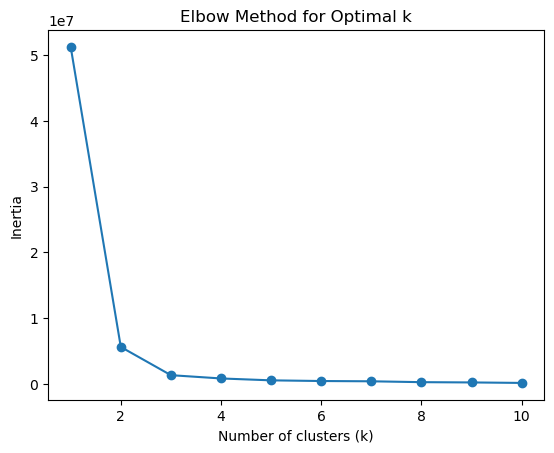

In [25]:
import matplotlib.pyplot as plt
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
final_scores_clustered = final_scores.to_frame() 
final_scores_clustered['cluster'] = kmeans.fit_predict(X)


In [28]:

print(final_scores_clustered)
print(final_scores_clustered.groupby('cluster')['final_score'].mean())


                                            final_score  cluster
0x00000000001accfa9cef68cf5371a23025b6d4b6          727        0
0x000000000051d07a4fb3bd10121a343d85818da6          727        0
0x000000000096026fb41fc39f9875d164bd82e2dc          735        0
0x0000000000e189dd664b9ab08a33c4839953852c          881        2
0x0000000002032370b971dabd36d72f3e5a7bf1ee          890        2
...                                                 ...      ...
0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30          727        0
0x06189341e523a52ae10c4bd4a7774371fac1b249          730        0
0x0618c450370822c5cb25ec143a3008230d8e2c12          728        0
0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2          764        0
0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a          798        3

[3497 rows x 2 columns]
cluster
0    732.829869
1     70.455446
2    859.891509
3    800.310580
Name: final_score, dtype: float64


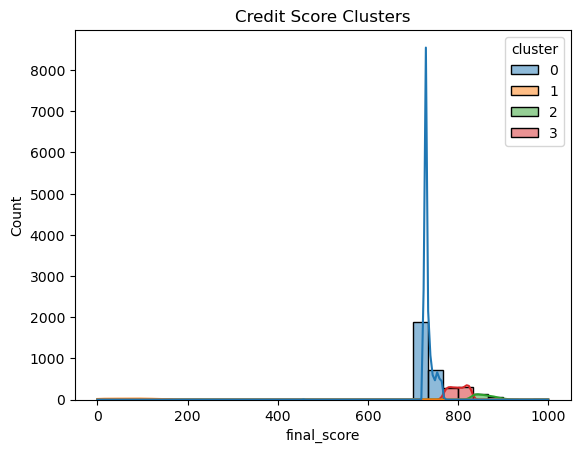

In [29]:
import seaborn as sns

sns.histplot(data=final_scores_clustered, x='final_score', hue='cluster', bins=30, palette='tab10', kde=True)
plt.title('Credit Score Clusters')
plt.show()


### Detail analysis is done in analysis.ipynb